# Installing library

In [1]:
!pip install -r "requirements.txt"

Defaulting to user installation because normal site-packages is not writeable


# Importing package

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import rasterio
import fiona
from rasterio.mask import mask

# Importing data

In [3]:
path = 'data/Shape_Data/local_unit.shp'
gdf=gpd.read_file(path)
#display the information
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATE_CODE  777 non-null    int32   
 1   DISTRICT    777 non-null    object  
 2   GaPa_NaPa   777 non-null    object  
 3   Type_GN     777 non-null    object  
 4   Province    777 non-null    object  
 5   geometry    777 non-null    geometry
dtypes: geometry(1), int32(1), object(4)
memory usage: 33.5+ KB


C:\Users\Innovative-IT\anaconda3\Lib\site-packages\pyogrio\core.py:35: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()


In [4]:
gdf.head()


,STATE_CODE,DISTRICT,GaPa_NaPa,Type_GN,Province,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,"POLYGON ((87.61 27.37, 87.611 27.369, 87.613 2..."
1,1,TAPLEJUNG,Maiwakhola,Gaunpalika,1,"POLYGON ((87.504 27.429, 87.507 27.428, 87.508..."
2,1,TAPLEJUNG,Meringden,Gaunpalika,1,"POLYGON ((87.513 27.569, 87.513 27.569, 87.512..."
3,1,TAPLEJUNG,Mikwakhola,Gaunpalika,1,"POLYGON ((87.689 27.71, 87.689 27.709, 87.689 ..."
4,1,TAPLEJUNG,Phaktanglung,Gaunpalika,1,"POLYGON ((87.837 27.951, 87.837 27.951, 87.838..."


In [5]:
#display columns in datasets 
print (gdf.columns)

Index(['STATE_CODE', 'DISTRICT', 'GaPa_NaPa', 'Type_GN', 'Province',
       'geometry'],
      dtype='object')


In [6]:
#Check the CRS (Coordinate Reference System) of the data
print (gdf.crs)

GEOGCS["NepalDD",DATUM["D_Everest_Bangladesh",SPHEROID["Everest 1830 (1937 Adjustment)",6377276.345,300.8017,AUTHORITY["EPSG","7015"]]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [7]:
#check the missing value 
gdf.isnull().sum()

STATE_CODE    0
DISTRICT      0
GaPa_NaPa     0
Type_GN       0
Province      0
geometry      0
dtype: int64

# Plotting the GIS data of Nepal

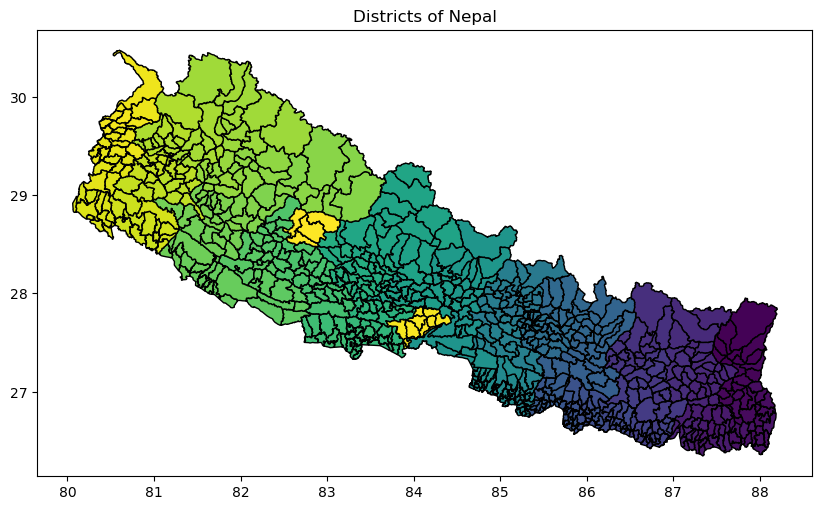

In [8]:
gdf.plot(figsize=(10, 6), cmap="viridis", edgecolor="black")
plt.title("Districts of Nepal")
plt.show()

# Plot by State Code


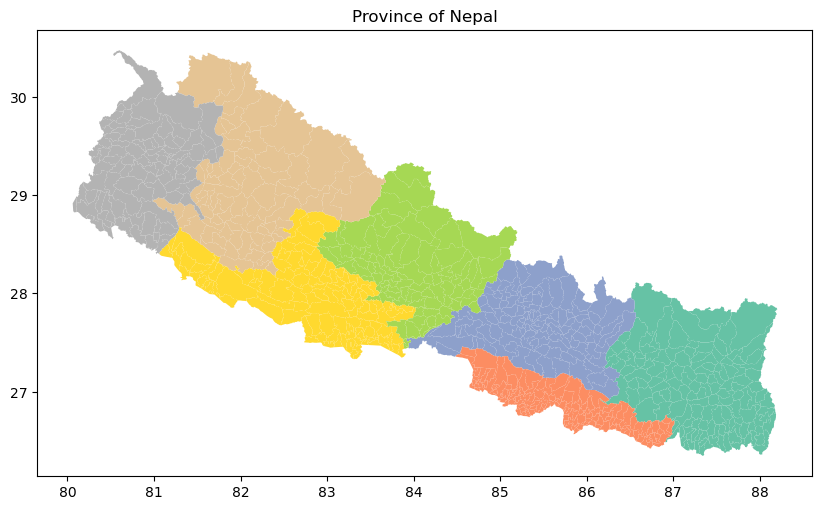

In [9]:
gdf.plot(column="STATE_CODE", cmap="Set2", legend=False, figsize=(10, 6))
plt.title("Province of Nepal")
plt.show()

# Plot by DISTRICT


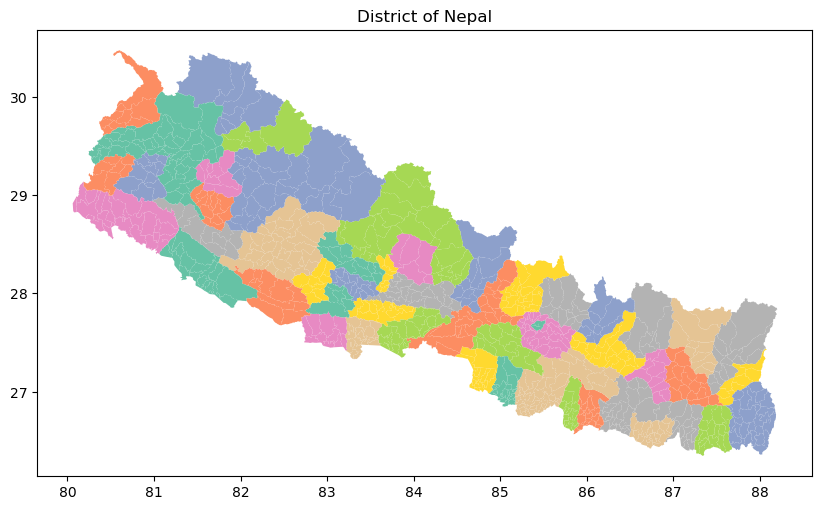

In [10]:
gdf.plot(column="DISTRICT", cmap="Set2", legend=False, figsize=(10, 6))
plt.title("District of Nepal")
plt.show()

# Plot by Municipalities of Nepal

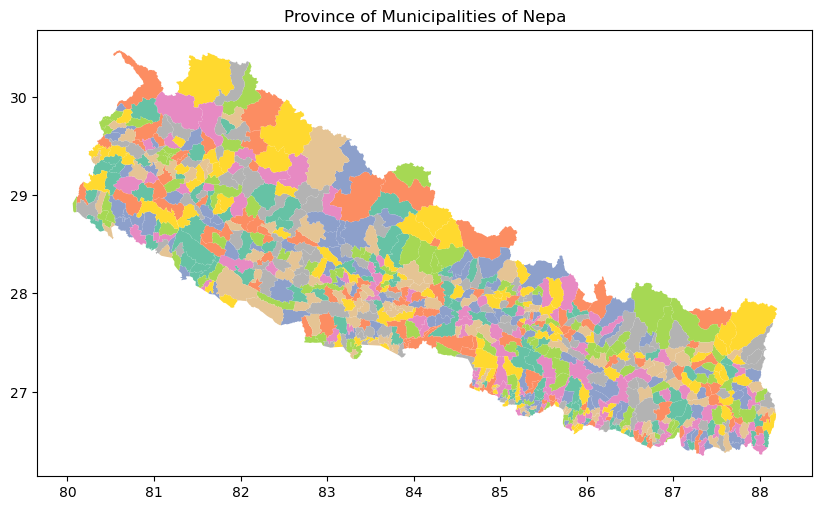

In [11]:
gdf.plot(column="GaPa_NaPa", cmap="Set2", legend=False, figsize=(10, 6))
plt.title("Province of Municipalities of Nepa")
plt.show()


# Import raster file path 

In [12]:

raster_precipitation_path_2020 = "data/nepal_climate_data/nepal_precipitation_2020.tif"
raster_precipitation_path_2050 = "data/nepal_climate_data/nepal_precipitation_2050.tif"
raster_temperature_path_2020 = "data/nepal_climate_data/nepal_temperature_2020.tif"
raster_temperature_path_2050 = "data/nepal_climate_data/nepal_temperature_2050.tif"

In [13]:
# Function to load raster image
def read_raster(path):
	with rasterio.open(path) as src:
		raster_src = src.read(1)
		profile = src.profile

	return raster_src, profile

In [14]:
# Loading the raster image
temp_2020, temp_profile_2020 = read_raster(raster_temperature_path_2020)
temp_2050, temp_profile_2050 = read_raster(raster_temperature_path_2050)
precip_2020, precip_profile_2020 = read_raster(raster_precipitation_path_2020)
precip_2050, precip_profile_2050 = read_raster(raster_precipitation_path_2050)

In [15]:
temp_2020.max()


8.138670708338557

# Mask raster with the vector file (Nepal boundaries)

In [16]:
def mask_raster(raster_path, vector_path):
    with fiona.open(vector_path, "r") as shapefile:
        shapes = [feature["geometry"] for feature in shapefile]  # Read vector geometry

    with rasterio.open(raster_path) as src:
        out_image, out_transform = mask(src, shapes, crop=True)  # Mask raster
        out_image = out_image[8]  # Extract the first band

    return out_image


# Plot the masked raster


In [17]:
# Apply masking Temperature 2020
mask_temp_2020 = mask_raster(raster_temperature_path_2020, path)


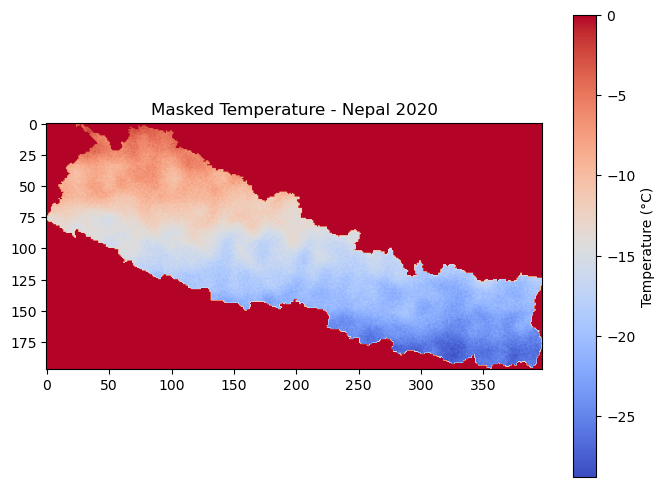

In [18]:
plt.figure(figsize=(8, 6))
plt.imshow(mask_temp_2020, cmap="coolwarm")
plt.title("Masked Temperature - Nepal 2020")
plt.colorbar(label="Temperature (°C)")
plt.show()

In [19]:
#  masking 2050 Temperature
mask_temp_2050 = mask_raster(raster_temperature_path_2050, path)




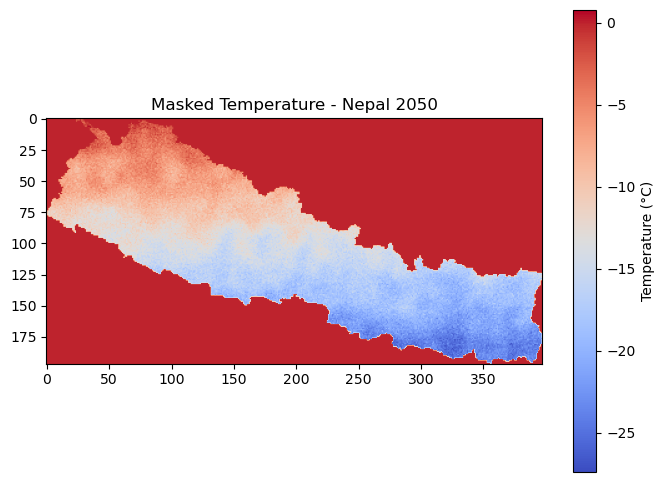

In [20]:
plt.figure(figsize=(8, 6))
plt.imshow(mask_temp_2050, cmap="coolwarm")
plt.title("Masked Temperature - Nepal 2050")
plt.colorbar(label="Temperature (°C)")
plt.show()



# Plot the 2020 Precipitaiton


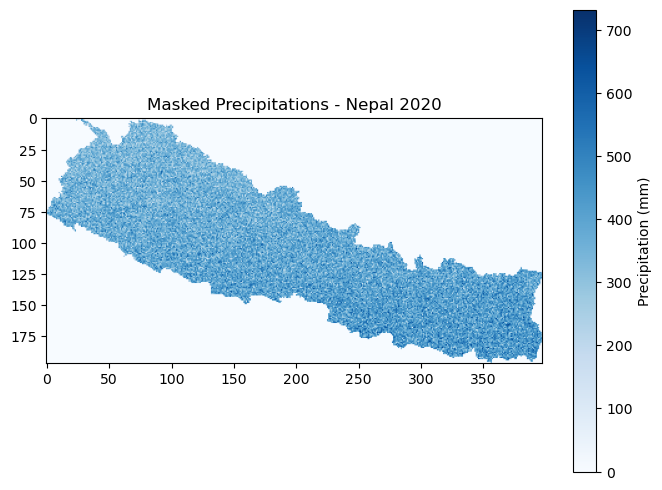

In [21]:
# Apply masking 2020 Precipitaiton
mask_precip_2020 = mask_raster(raster_precipitation_path_2020, path)

plt.figure(figsize=(8, 6))
plt.imshow(mask_precip_2020, cmap="Blues")
plt.title("Masked Precipitations - Nepal 2020")
plt.colorbar(label="Precipitation (mm)")
plt.show()

In [22]:


# Plot the 2050 Precipitaiton

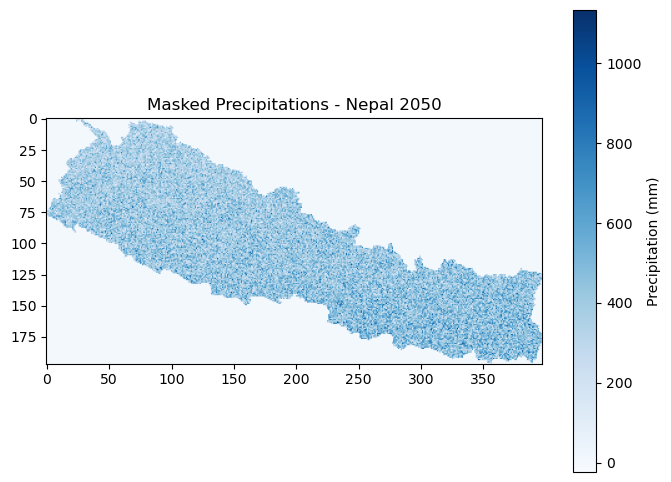

In [23]:
# Apply masking 2050 Precipitaiton
mask_precip_2050 = mask_raster(raster_precipitation_path_2050, path)


plt.figure(figsize=(8, 6))
plt.imshow(mask_precip_2050, cmap="Blues")
plt.title("Masked Precipitations - Nepal 2050")
plt.colorbar(label="Precipitation (mm)")
plt.show()

## Visualization



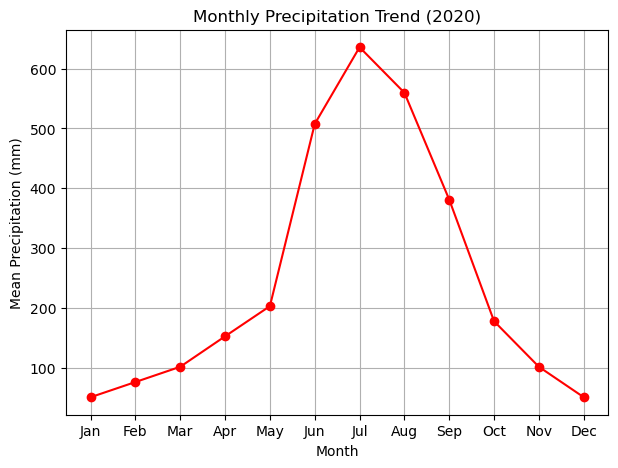

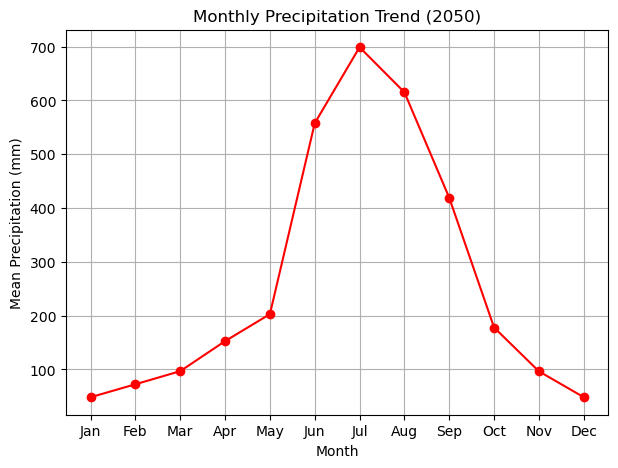

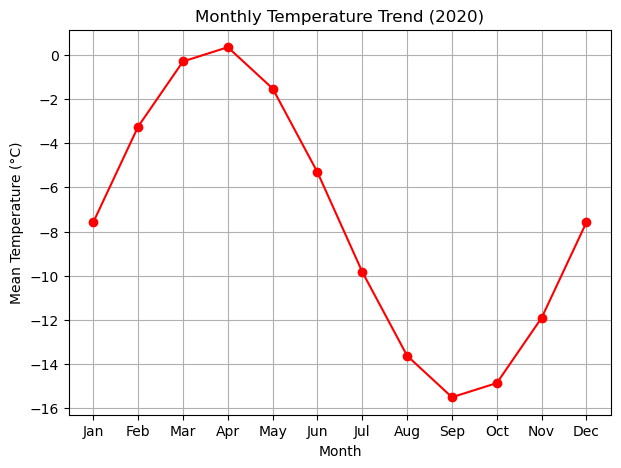

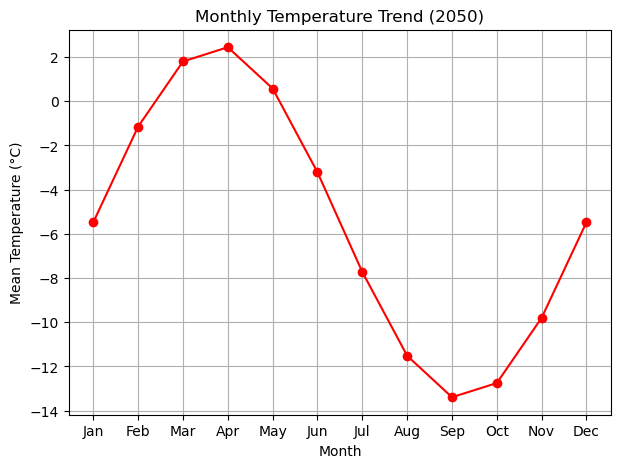

In [24]:


# Function to extract monthly values from a raster with multiple bands (12 bands = 12 months)
def monthly_values(path):
    with rasterio.open(path) as src:
        monthly_values = [src.read(i) for i in range(1, 13)]  # Load all 12 bands 
    return monthly_values

# Function to compute monthly mean values
def monthly_mean(monthly_values):
    monthly_means = [np.mean(month) for month in monthly_values]
    return monthly_means

# Function to compute statistical summaries (mean, median, std, min, max)
def compute_statistics(monthly_means, label, year):
    stats = {
        "Mean": np.mean(monthly_means),
        "Median": np.median(monthly_means),
        "Standard Deviation": np.std(monthly_means),
        "Min": np.min(monthly_means),
        "Max": np.max(monthly_means)
    }
    print(f"\n📊 Statistical Summary for {label} ({year}):")
    for key, value in stats.items():
        print(f"{key}: {value:.2f}")
    return stats

# Function to plot the monthly trends of temperature or precipitation
def plot_monthly_trend(monthly_means, label, units, year):
    plt.figure(figsize=(7, 5))
    plt.plot(range(1, 13), monthly_means, marker="o", linestyle="-", color="red")
    plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.xlabel("Month")
    plt.ylabel(f"Mean {label} ({units})")
    plt.title(f"Monthly {label} Trend ({year})")
    plt.grid(True)
    plt.show()

# File paths (update these with your actual raster file paths)
raster_precipitation_path_2020 = "data/nepal_climate_data/nepal_precipitation_2020.tif"
raster_precipitation_path_2050 = "data/nepal_climate_data/nepal_precipitation_2050.tif"
raster_temperature_path_2020 = "data/nepal_climate_data/nepal_temperature_2020.tif"
raster_temperature_path_2050 = "data/nepal_climate_data/nepal_temperature_2050.tif"
# Load monthly raster data
monthly_temp_2020 = monthly_values(raster_temperature_path_2020)
monthly_temp_2050 = monthly_values(raster_temperature_path_2050)
monthly_precip_2020 = monthly_values(raster_precipitation_path_2020)
monthly_precip_2050 = monthly_values(raster_precipitation_path_2050)

# Compute monthly mean temperature and precipitation for 2020 / 2050
monthly_mean_temp_2020 = monthly_mean(monthly_temp_2020)
monthly_mean_temp_2050 = monthly_mean(monthly_temp_2050)
monthly_mean_precip_2020 = monthly_mean(monthly_precip_2020)
monthly_mean_precip_2050 = monthly_mean(monthly_precip_2050)

# Plotting the monthly trend of precipitation and temperatures
plot_monthly_trend(monthly_mean_precip_2020, "Precipitation", "mm", 2020)
plot_monthly_trend(monthly_mean_precip_2050, "Precipitation", "mm", 2050)
plot_monthly_trend(monthly_mean_temp_2020, "Temperature", "°C", 2020)
plot_monthly_trend(monthly_mean_temp_2050, "Temperature", "°C", 2050)



# Compute and display statistical summaries


In [25]:
compute_statistics(monthly_mean_temp_2020, "Temperature", 2020)
compute_statistics(monthly_mean_temp_2050, "Temperature", 2050)
compute_statistics(monthly_mean_precip_2020, "Precipitation", 2020)
compute_statistics(monthly_mean_precip_2050, "Precipitation", 2050)



📊 Statistical Summary for Temperature (2020):
Mean: -7.58
Median: -7.58
Standard Deviation: 5.42
Min: -15.50
Max: 0.34

📊 Statistical Summary for Temperature (2050):
Mean: -5.47
Median: -5.47
Standard Deviation: 5.42
Min: -13.39
Max: 2.44

📊 Statistical Summary for Precipitation (2020):
Mean: 249.89
Median: 165.21
Standard Deviation: 203.85
Min: 50.84
Max: 635.77

📊 Statistical Summary for Precipitation (2050):
Mean: 265.50
Median: 165.21
Standard Deviation: 229.50
Min: 48.29
Max: 698.86


{'Mean': 265.49660279493634,
 'Median': 165.2073218333653,
 'Standard Deviation': 229.5045242698655,
 'Min': 48.285593218473295,
 'Max': 698.8635600598338}

# Trend line  of temperature and precipitation in 2020 and 2050

In [26]:
def plot_temperature_trend(monthly_mean_2020, monthly_mean_2050):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 13), monthly_mean_2020, marker='o', linestyle='-', color='blue', label='2020 Temperature (°C)')
    plt.plot(range(1, 13), monthly_mean_2050, marker='o', linestyle='-', color='red', label='2050 Temperature (°C)')
    
    plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.xlabel('Month')
    plt.ylabel('Average Temperature (°C)')
    plt.title('Monthly Temperature Trend (2020 vs 2050)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

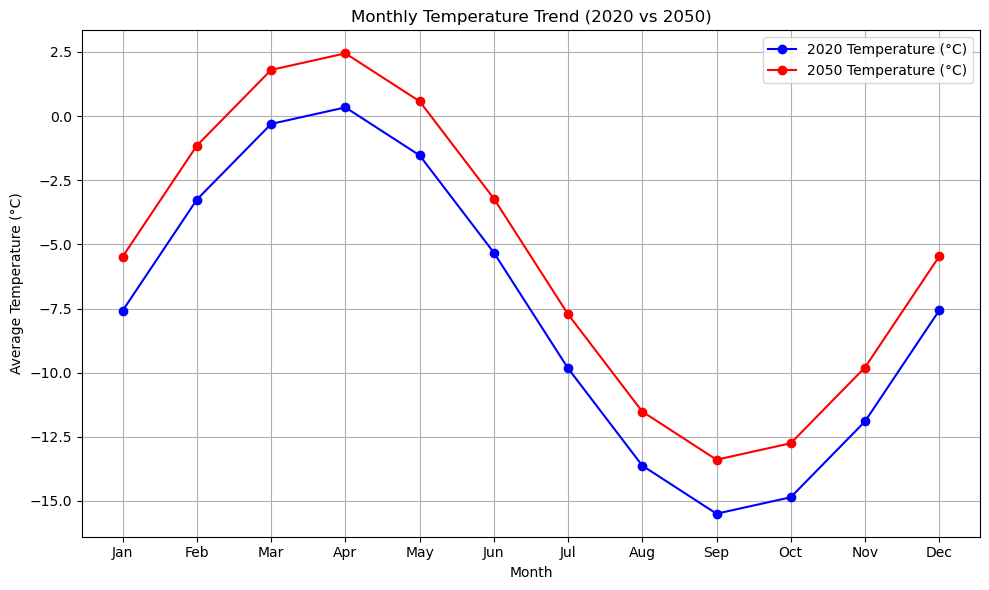

In [27]:
# Plot the temperature trends for 2020 and 2050
plot_temperature_trend(monthly_mean_temp_2020, monthly_mean_temp_2050)

In [28]:
#Function to plot the precipitation trend for both years 2020 and 2050
def plot_precipitation_trend(monthly_mean_2020, monthly_mean_2050):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 13), monthly_mean_2020, marker='o', linestyle='-', color='blue', label='2020 Precipitation (mm)')
    plt.plot(range(1, 13), monthly_mean_2050, marker='o', linestyle='-', color='green', label='2050 Precipitation (mm)')
    
    plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.xlabel('Month')
    plt.ylabel('Average Precipitation (mm)')
    plt.title('Monthly Precipitation Trend (2020 vs 2050)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

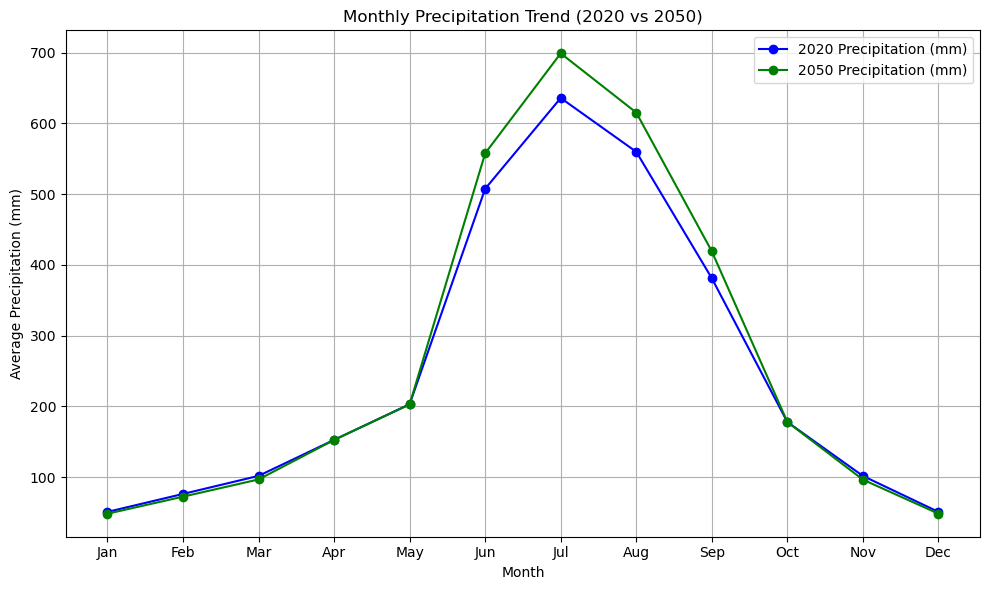

In [29]:
plot_precipitation_trend(monthly_mean_precip_2020, monthly_mean_precip_2050)

In [30]:
# Function to plot dual-axis temperature and precipitation trends
def plot_dual_axis_trend(temp_2020, temp_2050, precip_2020, precip_2050):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Temperature plot (Left axis)
    ax1.plot(range(1, 13), temp_2020, marker='o', linestyle='-', color='blue', label='2020 Temp (°C)')
    ax1.plot(range(1, 13), temp_2050, marker='o', linestyle='-', color='red', label='2050 Temp (°C)')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Temperature (°C)', color='black')
    ax1.tick_params(axis='y', labelcolor='black')

    # Precipitation plot (Right axis)
    ax2 = ax1.twinx()  # Instantiate the second y-axis
    ax2.plot(range(1, 13), precip_2020, marker='o', linestyle='--', color='green', label='2020 Precipitation (mm)')
    ax2.plot(range(1, 13), precip_2050, marker='o', linestyle='--', color='orange', label='2050 Precipitation (mm)')
    ax2.set_ylabel('Precipitation (mm)', color='black')
    ax2.tick_params(axis='y', labelcolor='black')

    # Adding titles and grid
    ax1.set_title('Temperature and Precipitation Trend (2020 vs 2050)')
    fig.tight_layout()  # To ensure the layout is clean
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.grid(True)
    plt.show()


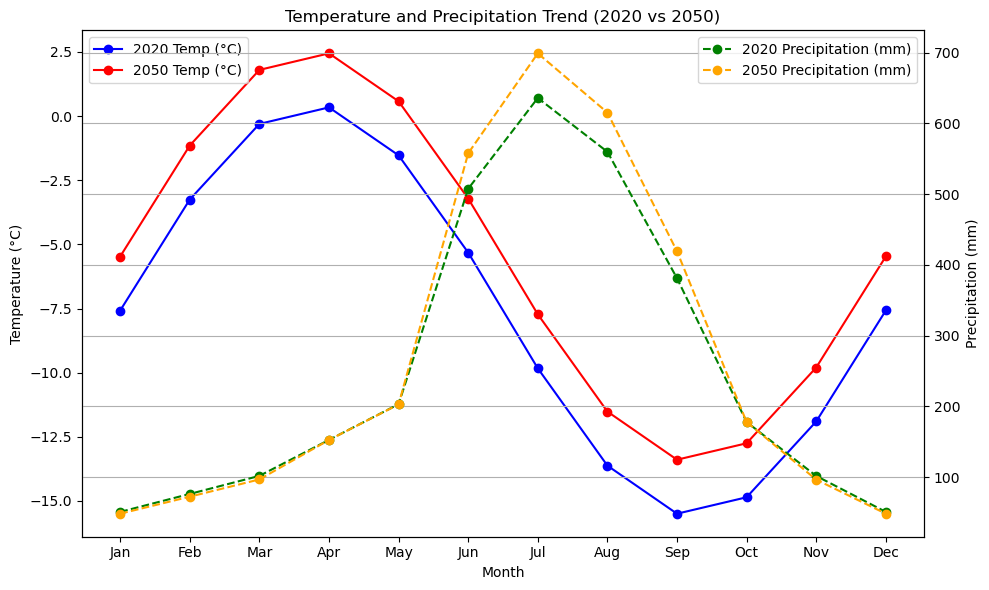

In [31]:
# Plot the dual-axis trends for both temperature and precipitation
plot_dual_axis_trend(monthly_mean_temp_2020, monthly_mean_temp_2050, monthly_mean_precip_2020, monthly_mean_precip_2050)


# Observations or insights

Temperature:Observe an increasing trend in temperature from 2020 to 2050, with more extreme temperature events.
Precipitation: Depending on the precipitation patterns (monthly trends), you might see an increase in rainfall in certain months or a shift in the monsoon period. 
Nepal is projected to experience:Warmer temperatures, especially in high-altitude zones, with impacts on glaciers and ecosystems.More extreme precipitation, including heavier rains and possible droughts, creating dual risks of floods and water scarcity.Critical needs for adaptive strategies in agriculture, infrastructure, and resource management to mitigate climate risks.